In [90]:
# %matplotlib notebook
%matplotlib inline

%load_ext rpy2.ipython

# %connect_info

import jzap.misc
text = """
Jupyter connect hash:
{word}

To get matching file:
    $> python -c "import jzap.misc; print(jzap.misc.notebook_file('{word}', '/home/jeff/.local/share/jupyter/runtime'))"
To connect to existing notebook:
    $> jupyter console --existing FILE
    
"""
print(text.format(word=jzap.misc.notebook_word()))
print("Last run: {}".format(jzap.misc.timestamp()))

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython

Jupyter connect hash:
always

To get matching file:
    $> python -c "import jzap.misc; print(jzap.misc.notebook_file('always', '/home/jeff/.local/share/jupyter/runtime'))"
To connect to existing notebook:
    $> jupyter console --existing FILE
    

Last run: 2018-05-18-20h49m48s


In [91]:
import numpy as np
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols, mixedlm
from statsmodels.stats.anova import anova_lm
import patsy
import matplotlib.pyplot as plt
import seaborn as sns

import jzap
import replay.lib.settings

import warnings
warnings.filterwarnings('ignore')

# path = '/lab/data/behavior_replay_180316.txt'
path = '/lab/data/behavior_replay_180518.txt'

data = jzap.misc.load_table(path)
print(data.columns)
print(data.head())

Index([u'mouse', u'date', u'day_sum_eqdist_0_1_plus',
       u'day_frac_eqdist_0_1_plus', u'day_sum_eqdist_0_1_minus',
       u'day_frac_eqdist_0_1_minus', u'dprime', u'hmm_dprime',
       u'hmm_dprime_noneutral', u'hmm_dprime_run2', u'hmm_dprime_run3',
       u'hmm_dprime_run4', u'hmm_engagement', u'training_licks',
       u'lick_latency', u'running', u'replay_freq_0_1_plus',
       u'replay_freq_0_1_neutral', u'replay_freq_0_1_minus', u'n_stimuli_plus',
       u'n_stimuli_neutral', u'n_stimuli_minus', u'n_ensure', u'ncorrect_plus',
       u'ncorrect_minus', u'ncorrect_neutral', u'nfalse_plus', u'nfalse_minus',
       u'nfalse_neutral', u'hmm_ncorrect_plus', u'hmm_ncorrect_minus',
       u'hmm_ncorrect_neutral', u'hmm_nfalse_plus', u'hmm_nfalse_minus',
       u'hmm_nfalse_neutral', u'hmm_nfalse_all', u'hmm_ncorrect_all',
       u'fraction_visually_driven_50_plus',
       u'fraction_visually_driven_50_minus',
       u'fraction_visually_driven_50_neutral',
       u'fraction_visually_dri

In [92]:
colors = replay.lib.settings.colors()

## Reactivation driven by task performance

In [4]:
# formula = 'replay_freq_0_1_all ~ hmm_dprime * d_hmm_dprime_prev'
# lm = ols(formula, data).fit()
# print(lm.summary2())
# print(anova_lm(lm))

formula = 'replay_freq_0_1_all ~ hmm_dprime * d_hmm_dprime_prev'

data_sub = data[['replay_freq_0_1_all', 'hmm_dprime', 'd_hmm_dprime_prev',
                 'mouse']]
data_sub.dropna(inplace=True)
md = mixedlm(formula, data_sub, groups='mouse', re_formula='1').fit()
print(md.summary())

                 Mixed Linear Model Regression Results
Model:              MixedLM   Dependent Variable:   replay_freq_0_1_all
No. Observations:   92        Method:               REML               
No. Groups:         8         Scale:                0.0001             
Min. group size:    7         Likelihood:           252.1824           
Max. group size:    21        Converged:            Yes                
Mean group size:    11.5                                               
-----------------------------------------------------------------------
                             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------
Intercept                     0.021    0.004  5.141 0.000  0.013  0.029
hmm_dprime                   -0.004    0.001 -2.808 0.005 -0.007 -0.001
d_hmm_dprime_prev             0.002    0.002  1.277 0.202 -0.001  0.006
hmm_dprime:d_hmm_dprime_prev -0.000    0.001 -0.318 0.751 -0.002  0.001
Group RE 

In [5]:
formula = 'replay_freq_0_1_all ~ d_hmm_behav_plus_prev + d_hmm_behav_neutral_prev + d_hmm_behav_minus_prev'

data_sub = data[['replay_freq_0_1_all', 'd_hmm_behav_plus_prev',
                 'd_hmm_behav_minus_prev', 'd_hmm_behav_neutral_prev',
                 'mouse']]
data_sub.dropna(inplace=True)
md = mixedlm(formula, data_sub, groups='mouse', re_formula='1').fit()
print(md.summary())

               Mixed Linear Model Regression Results
Model:              MixedLM Dependent Variable: replay_freq_0_1_all
No. Observations:   92      Method:             REML               
No. Groups:         8       Scale:              0.0001             
Min. group size:    7       Likelihood:         255.1125           
Max. group size:    21      Converged:          Yes                
Mean group size:    11.5                                           
-------------------------------------------------------------------
                         Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------
Intercept                 0.013    0.004  3.675 0.000  0.006  0.020
d_hmm_behav_plus_prev     0.006    0.008  0.765 0.444 -0.010  0.022
d_hmm_behav_neutral_prev -0.002    0.010 -0.181 0.857 -0.022  0.018
d_hmm_behav_minus_prev   -0.008    0.009 -0.864 0.387 -0.027  0.010
Group RE                  0.000    0.005                       

In [6]:
formula = 'replay_freq_0_1_plus ~ d_hmm_behav_plus_prev + d_hmm_behav_neutral_prev + d_hmm_behav_minus_prev'

data_sub = data[['replay_freq_0_1_plus', 'd_hmm_behav_plus_prev',
                 'd_hmm_behav_minus_prev', 'd_hmm_behav_neutral_prev',
                 'mouse']]
data_sub.dropna(inplace=True)
md = mixedlm(formula, data_sub, groups='mouse', re_formula='1').fit()
print(md.summary())

               Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: replay_freq_0_1_plus
No. Observations:  101     Method:             REML                
No. Groups:        8       Scale:              0.0000              
Min. group size:   8       Likelihood:         349.8114            
Max. group size:   22      Converged:          Yes                 
Mean group size:   12.6                                            
-------------------------------------------------------------------
                         Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------
Intercept                 0.005    0.002  2.882 0.004  0.002  0.009
d_hmm_behav_plus_prev     0.002    0.004  0.509 0.611 -0.006  0.010
d_hmm_behav_neutral_prev  0.002    0.005  0.467 0.640 -0.007  0.012
d_hmm_behav_minus_prev   -0.006    0.005 -1.386 0.166 -0.016  0.003
Group RE                  0.000    0.002                       

In [7]:
formula = 'replay_freq_0_1_all ~ behavior_fa + behavior_miss'

data_sub = data[['replay_freq_0_1_all', 'behavior_fa', 'behavior_miss',
                 'mouse']]
data_sub.dropna(inplace=True)
md = mixedlm(formula, data_sub, groups='mouse', re_formula='1').fit()
print(md.summary())

              Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: replay_freq_0_1_all
No. Observations: 102     Method:             REML               
No. Groups:       8       Scale:              0.0001             
Min. group size:  7       Likelihood:         293.6569           
Max. group size:  23      Converged:          Yes                
Mean group size:  12.8                                           
-------------------------------------------------------------------
                 Coef.   Std.Err.     z     P>|z|   [0.025   0.975]
-------------------------------------------------------------------
Intercept        0.006      0.004   1.609   0.108   -0.001    0.013
behavior_fa      0.026      0.009   2.912   0.004    0.008    0.043
behavior_miss    0.005      0.004   1.126   0.260   -0.004    0.013
Group RE         0.000      0.003                                  



In [8]:
formula = 'replay_freq_0_1_all ~ hmm_behavior_fa + hmm_behavior_miss'

data_sub = data[['replay_freq_0_1_all', 'hmm_behavior_fa', 'hmm_behavior_miss',
                 'mouse']]
data_sub.dropna(inplace=True)
md = mixedlm(formula, data_sub, groups='mouse', re_formula='1').fit()
print(md.summary())

              Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: replay_freq_0_1_all
No. Observations: 103     Method:             REML               
No. Groups:       8       Scale:              0.0001             
Min. group size:  7       Likelihood:         297.9808           
Max. group size:  23      Converged:          Yes                
Mean group size:  12.9                                           
------------------------------------------------------------------
                     Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
------------------------------------------------------------------
Intercept            0.006     0.004  1.827  0.068  -0.000   0.013
hmm_behavior_fa      0.023     0.008  2.949  0.003   0.008   0.039
hmm_behavior_miss    0.001     0.008  0.121  0.904  -0.014   0.016
Group RE             0.000     0.003                              



In [9]:
formula = 'replay_freq_0_1_all ~ d_fa_prev + d_miss_prev'

data_sub = data[['replay_freq_0_1_all', 'd_fa_prev', 'd_miss_prev',
                 'mouse']]
data_sub.dropna(inplace=True)
md = mixedlm(formula, data_sub, groups='mouse', re_formula='1').fit()
print(md.summary())

              Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: replay_freq_0_1_all
No. Observations: 91      Method:             REML               
No. Groups:       8       Scale:              0.0001             
Min. group size:  7       Likelihood:         254.2423           
Max. group size:  21      Converged:          Yes                
Mean group size:  11.4                                           
-------------------------------------------------------------------
               Coef.    Std.Err.     z      P>|z|   [0.025   0.975]
-------------------------------------------------------------------
Intercept       0.013      0.004    3.627   0.000    0.006    0.020
d_fa_prev       0.006      0.009    0.658   0.511   -0.012    0.024
d_miss_prev    -0.000      0.004   -0.001   0.999   -0.009    0.009
Group RE        0.000      0.005                                   



In [10]:
formula = 'replay_freq_0_1_all ~ d_hmm_behav_plus_prev + d_hmm_behav_neutral_prev + d_hmm_behav_minus_prev + hmm_behavior_fa + hmm_behavior_miss'

data_sub = data[['replay_freq_0_1_all', 'd_hmm_behav_plus_prev',
                 'd_hmm_behav_minus_prev', 'd_hmm_behav_neutral_prev',
                 'mouse', 'hmm_behavior_fa', 'hmm_behavior_miss']]
data_sub.dropna(inplace=True)
md = mixedlm(formula, data_sub, groups='mouse', re_formula='1').fit()
print(md.summary())

               Mixed Linear Model Regression Results
Model:              MixedLM Dependent Variable: replay_freq_0_1_all
No. Observations:   92      Method:             REML               
No. Groups:         8       Scale:              0.0001             
Min. group size:    7       Likelihood:         254.3957           
Max. group size:    21      Converged:          Yes                
Mean group size:    11.5                                           
-------------------------------------------------------------------
                         Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------
Intercept                 0.005    0.004  1.201 0.230 -0.003  0.012
d_hmm_behav_plus_prev     0.003    0.010  0.325 0.745 -0.016  0.023
d_hmm_behav_neutral_prev  0.009    0.010  0.922 0.357 -0.010  0.029
d_hmm_behav_minus_prev   -0.003    0.009 -0.285 0.775 -0.021  0.016
hmm_behavior_fa           0.034    0.010  3.201 0.001  0.013  0

In [11]:
formula = 'replay_freq_0_1_all ~ d_hmm_behav_plus_prev + d_hmm_behav_neutral_prev + d_hmm_behav_minus_prev + hmm_behavior_fa + hmm_behavior_miss'
lm = ols(formula, data).fit()
print(lm.summary2())
print(anova_lm(lm))

                    Results: Ordinary least squares
Model:               OLS                 Adj. R-squared:     0.189     
Dependent Variable:  replay_freq_0_1_all AIC:                -531.9022 
Date:                2018-05-18 13:55    BIC:                -516.7714 
No. Observations:    92                  Log-Likelihood:     271.95    
Df Model:            5                   F-statistic:        5.228     
Df Residuals:        86                  Prob (F-statistic): 0.000308  
R-squared:           0.233               Scale:              0.00016954
-----------------------------------------------------------------------
                          Coef.  Std.Err.    t    P>|t|   [0.025 0.975]
-----------------------------------------------------------------------
Intercept                -0.0006   0.0028 -0.2217 0.8251 -0.0061 0.0049
d_hmm_behav_plus_prev     0.0090   0.0108  0.8350 0.4060 -0.0124 0.0305
d_hmm_behav_neutral_prev  0.0170   0.0114  1.4890 0.1402 -0.0057 0.0397
d_hmm_behav_

In [12]:
formula = 'replay_freq_0_1_all ~ d_hmm_dprime_prev * hmm_dprime'

data_sub = data[['replay_freq_0_1_all', 'd_hmm_dprime_prev', 'hmm_dprime',
                 'mouse']]
data_sub.dropna(inplace=True)
md = mixedlm(formula, data_sub, groups='mouse', re_formula='1').fit()
print(md.summary())

                 Mixed Linear Model Regression Results
Model:              MixedLM   Dependent Variable:   replay_freq_0_1_all
No. Observations:   92        Method:               REML               
No. Groups:         8         Scale:                0.0001             
Min. group size:    7         Likelihood:           252.1824           
Max. group size:    21        Converged:            Yes                
Mean group size:    11.5                                               
-----------------------------------------------------------------------
                             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------
Intercept                     0.021    0.004  5.141 0.000  0.013  0.029
d_hmm_dprime_prev             0.002    0.002  1.277 0.202 -0.001  0.006
hmm_dprime                   -0.004    0.001 -2.808 0.005 -0.007 -0.001
d_hmm_dprime_prev:hmm_dprime -0.000    0.001 -0.318 0.751 -0.002  0.001
Group RE 

In [13]:
formula = 'replay_freq_0_1_all ~ hmm_dprime'

data_sub = data[['replay_freq_0_1_all', 'hmm_dprime',
                 'mouse']]
data_sub.dropna(inplace=True)
md = mixedlm(formula, data_sub, groups='mouse', re_formula='1').fit()
print(md.summary())

              Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: replay_freq_0_1_all
No. Observations: 103     Method:             REML               
No. Groups:       8       Scale:              0.0001             
Min. group size:  7       Likelihood:         297.8465           
Max. group size:  23      Converged:          Yes                
Mean group size:  12.9                                           
-------------------------------------------------------------------
               Coef.    Std.Err.     z      P>|z|   [0.025   0.975]
-------------------------------------------------------------------
Intercept       0.018      0.004    4.942   0.000    0.011    0.025
hmm_dprime     -0.003      0.001   -2.588   0.010   -0.005   -0.001
Group RE        0.000      0.004                                   



In [14]:
formula = 'replay_freq_0_1_plus ~ hmm_behavior_fa + hmm_behavior_miss'

data_sub = data[['replay_freq_0_1_plus', 'mouse',
                 'hmm_behavior_fa', 'hmm_behavior_miss']]
data_sub.dropna(inplace=True)
md = mixedlm(formula, data_sub, groups='mouse', re_formula='1').fit()
print(md.summary())

               Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: replay_freq_0_1_plus
No. Observations: 114     Method:             REML                
No. Groups:       8       Scale:              0.0000              
Min. group size:  9       Likelihood:         412.7358            
Max. group size:  24      Converged:          Yes                 
Mean group size:  14.2                                            
-------------------------------------------------------------------
                    Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
-------------------------------------------------------------------
Intercept            0.002     0.002   1.117  0.264  -0.001   0.005
hmm_behavior_fa      0.013     0.004   3.728  0.000   0.006   0.020
hmm_behavior_miss   -0.004     0.004  -1.124  0.261  -0.011   0.003
Group RE             0.000     0.002                               



In [15]:
formula = 'replay_freq_0_1_minus ~ hmm_behavior_fa + hmm_behavior_miss'

data_sub = data[['replay_freq_0_1_minus', 'mouse',
                 'hmm_behavior_fa', 'hmm_behavior_miss']]
data_sub.dropna(inplace=True)
md = mixedlm(formula, data_sub, groups='mouse', re_formula='1').fit()
print(md.summary())

               Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: replay_freq_0_1_minus
No. Observations: 111     Method:             REML                 
No. Groups:       8       Scale:              0.0000               
Min. group size:  9       Likelihood:         408.9892             
Max. group size:  24      Converged:          Yes                  
Mean group size:  13.9                                             
--------------------------------------------------------------------
                       Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
--------------------------------------------------------------------
Intercept              0.002     0.001  2.158  0.031   0.000   0.005
hmm_behavior_fa        0.003     0.003  0.865  0.387  -0.004   0.010
hmm_behavior_miss      0.004     0.003  1.371  0.170  -0.002   0.011
Group RE               0.000     0.000                              



In [16]:
formula = 'replay_freq_0_1_neutral ~ hmm_behavior_fa + hmm_behavior_miss'

data_sub = data[['replay_freq_0_1_neutral', 'mouse',
                 'hmm_behavior_fa', 'hmm_behavior_miss']]
data_sub.dropna(inplace=True)
md = mixedlm(formula, data_sub, groups='mouse', re_formula='1').fit()
print(md.summary())

                Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: replay_freq_0_1_neutral
No. Observations: 108     Method:             REML                   
No. Groups:       8       Scale:              0.0000                 
Min. group size:  7       Likelihood:         417.7620               
Max. group size:  23      Converged:          Yes                    
Mean group size:  13.5                                               
-----------------------------------------------------------------------
                     Coef.   Std.Err.     z     P>|z|   [0.025   0.975]
-----------------------------------------------------------------------
Intercept            0.002      0.001   1.642   0.101   -0.000    0.005
hmm_behavior_fa      0.006      0.003   2.016   0.044    0.000    0.011
hmm_behavior_miss    0.000      0.003   0.161   0.872   -0.005    0.006
Group RE             0.000      0.002                                  



In [17]:
formula = 'replay_freq_0_1_all ~ (hmm_behavior_fa + hmm_behavior_miss) * day_in_phase '

data_sub = data[['replay_freq_0_1_all', 'mouse',
                 'hmm_behavior_fa', 'hmm_behavior_miss', 'hmm_dprime', 'day_in_phase']]
data_sub.dropna(inplace=True)
md = mixedlm(formula, data_sub, groups='mouse', re_formula='1').fit()
print(md.summary())

                  Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   replay_freq_0_1_all
No. Observations:     103       Method:               REML               
No. Groups:           8         Scale:                0.0001             
Min. group size:      7         Likelihood:           281.2005           
Max. group size:      23        Converged:            Yes                
Mean group size:      12.9                                               
-------------------------------------------------------------------------
                               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------------
Intercept                       0.002    0.005  0.330 0.741 -0.009  0.012
hmm_behavior_fa                 0.035    0.013  2.777 0.005  0.010  0.060
hmm_behavior_miss               0.005    0.010  0.478 0.633 -0.015  0.025
day_in_phase                    0.001    0.001  1.261 0.

In [18]:
formula = 'replay_freq_0_1_all ~ hmm_behavior_plus + hmm_behavior_minus + hmm_behavior_neutral'

data_sub = data[['replay_freq_0_1_all', 'mouse',
                 'hmm_behavior_fa', 'hmm_behavior_plus', 'hmm_behavior_minus', 'hmm_behavior_neutral']]
data_sub.dropna(inplace=True)
md = mixedlm(formula, data_sub, groups='mouse', re_formula='1').fit()
print(md.summary())
print(md.random_effects)

              Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: replay_freq_0_1_all
No. Observations: 103     Method:             REML               
No. Groups:       8       Scale:              0.0001             
Min. group size:  7       Likelihood:         295.0991           
Max. group size:  23      Converged:          Yes                
Mean group size:  12.9                                           
-----------------------------------------------------------------
                       Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------
Intercept               0.035    0.008  4.410 0.000  0.019  0.050
hmm_behavior_plus      -0.005    0.008 -0.563 0.573 -0.021  0.012
hmm_behavior_minus     -0.025    0.011 -2.217 0.027 -0.046 -0.003
hmm_behavior_neutral    0.001    0.011  0.095 0.924 -0.020  0.022
Group RE                0.000    0.003                           

{'CB173': Group    0.01

In [19]:
formula = 'replay_freq_0_1_all ~ hmm_behavior_plus + hmm_behavior_minus + hmm_behavior_neutral'
lm = ols(formula, data).fit()
print(lm.summary2())
print(anova_lm(lm))

                    Results: Ordinary least squares
Model:              OLS                 Adj. R-squared:     0.142     
Dependent Variable: replay_freq_0_1_all AIC:                -596.7610 
Date:               2018-05-18 13:55    BIC:                -586.2221 
No. Observations:   103                 Log-Likelihood:     302.38    
Df Model:           3                   F-statistic:        6.626     
Df Residuals:       99                  Prob (F-statistic): 0.000399  
R-squared:          0.167               Scale:              0.00017170
----------------------------------------------------------------------
                        Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
----------------------------------------------------------------------
Intercept               0.0431   0.0080  5.4030 0.0000  0.0273  0.0590
hmm_behavior_plus      -0.0119   0.0084 -1.4145 0.1603 -0.0287  0.0048
hmm_behavior_minus     -0.0274   0.0127 -2.1621 0.0330 -0.0525 -0.0023
hmm_behavior_neutral   -0

In [20]:
formula = 'replay_freq_0_1_all ~ hmm_behavior_fa + hmm_behavior_miss'
lm = ols(formula, data).fit()
print(lm.summary2())
print(anova_lm(lm))

                    Results: Ordinary least squares
Model:              OLS                 Adj. R-squared:     0.140     
Dependent Variable: replay_freq_0_1_all AIC:                -597.5167 
Date:               2018-05-18 13:55    BIC:                -589.6125 
No. Observations:   103                 Log-Likelihood:     301.76    
Df Model:           2                   F-statistic:        9.318     
Df Residuals:       100                 Prob (F-statistic): 0.000195  
R-squared:          0.157               Scale:              0.00017205
-----------------------------------------------------------------------
                      Coef.   Std.Err.    t     P>|t|    [0.025  0.975]
-----------------------------------------------------------------------
Intercept             0.0021    0.0024  0.8911  0.3750  -0.0026  0.0069
hmm_behavior_fa       0.0286    0.0085  3.3767  0.0010   0.0118  0.0453
hmm_behavior_miss     0.0085    0.0078  1.0848  0.2806  -0.0071  0.0241
-------------------

In [21]:
formula = 'replay_freq_0_1_all ~ hmm_dprime_run2 + hmm_dprime_run3 + hmm_dprime_run4'

data_sub = data[['replay_freq_0_1_all', 'mouse',
                 'hmm_dprime_run2', 'hmm_dprime_run3', 'hmm_dprime_run4']]
data_sub.dropna(inplace=True)
md = mixedlm(formula, data_sub, groups='mouse', re_formula='1').fit()
print(md.summary())

              Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: replay_freq_0_1_all
No. Observations: 101     Method:             REML               
No. Groups:       8       Scale:              0.0001             
Min. group size:  7       Likelihood:         279.4562           
Max. group size:  23      Converged:          Yes                
Mean group size:  12.6                                           
------------------------------------------------------------------
                   Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
------------------------------------------------------------------
Intercept           0.018     0.004   4.900  0.000   0.011   0.025
hmm_dprime_run2    -0.001     0.002  -0.713  0.476  -0.005   0.002
hmm_dprime_run3    -0.000     0.002  -0.119  0.905  -0.004   0.003
hmm_dprime_run4    -0.001     0.001  -0.903  0.366  -0.004   0.002
Group RE            0.000     0.003                               



In [22]:
formula = 'replay_freq_0_1_all ~ hmm_dprime + hmm_dprime_2 + d_hmm_dprime_prev + d_hmm_dprime_prev_2'

data_sub = data[['replay_freq_0_1_all', 'mouse',
                 'hmm_dprime', 'd_hmm_dprime_prev']]
data_sub = data_sub.assign(hmm_dprime_2=data_sub.hmm_dprime**2, d_hmm_dprime_prev_2=data_sub.d_hmm_dprime_prev**2)

data_sub.dropna(inplace=True)
md = mixedlm(formula, data_sub, groups='mouse', re_formula='1').fit()
print(md.summary())

              Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: replay_freq_0_1_all
No. Observations: 92      Method:             REML               
No. Groups:       8       Scale:              0.0001             
Min. group size:  7       Likelihood:         246.9541           
Max. group size:  21      Converged:          Yes                
Mean group size:  11.5                                           
-----------------------------------------------------------------
                       Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------
Intercept               0.026    0.005  5.037 0.000  0.016  0.036
hmm_dprime             -0.010    0.004 -2.326 0.020 -0.018 -0.002
hmm_dprime_2            0.001    0.001  1.457 0.145 -0.000  0.003
d_hmm_dprime_prev       0.002    0.001  1.326 0.185 -0.001  0.004
d_hmm_dprime_prev_2    -0.001    0.001 -1.019 0.308 -0.002  0.001
Group RE                

In [23]:
formula = 'replay_freq_0_1_all ~ hmm_dprime + d_hmm_dprime_prev + d_hmm_dprime_next + d_hmm_dprime_same_day'

data_sub = data[['replay_freq_0_1_all', 'mouse',
                 'hmm_dprime', 'd_hmm_dprime_prev', 'd_hmm_dprime_next', 'd_hmm_dprime_same_day']]

data_sub.dropna(inplace=True)
md = mixedlm(formula, data_sub, groups='mouse', re_formula='1').fit()
print(md.summary())

              Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: replay_freq_0_1_all
No. Observations: 78      Method:             REML               
No. Groups:       8       Scale:              0.0002             
Min. group size:  6       Likelihood:         201.5958           
Max. group size:  19      Converged:          Yes                
Mean group size:  9.8                                            
-----------------------------------------------------------------
                       Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------
Intercept               0.025    0.005  5.301 0.000  0.016  0.034
hmm_dprime             -0.006    0.002 -3.111 0.002 -0.009 -0.002
d_hmm_dprime_prev       0.000    0.002  0.151 0.880 -0.003  0.004
d_hmm_dprime_next      -0.002    0.002 -1.377 0.168 -0.005  0.001
d_hmm_dprime_same_day   0.000    0.001  0.149 0.882 -0.002  0.003
Group RE                

In [24]:
formula = 'replay_freq_0_1_all ~ (hmm_behavior_plus + hmm_behavior_minus + hmm_behavior_neutral) * day_in_phase'

data_sub = data[['replay_freq_0_1_all', 'mouse',
                 'hmm_behavior_plus', 'hmm_behavior_minus', 'hmm_behavior_neutral', 'day_in_phase']]

data_sub.dropna(inplace=True)
md = mixedlm(formula, data_sub, groups='mouse', re_formula='1').fit()
print(md.summary())

                    Mixed Linear Model Regression Results
Model:                 MixedLM    Dependent Variable:    replay_freq_0_1_all
No. Observations:      103        Method:                REML               
No. Groups:            8          Scale:                 0.0001             
Min. group size:       7          Likelihood:            273.4788           
Max. group size:       23         Converged:             Yes                
Mean group size:       12.9                                                 
----------------------------------------------------------------------------
                                  Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------------------
Intercept                          0.045    0.012  3.665 0.000  0.021  0.068
hmm_behavior_plus                 -0.008    0.011 -0.715 0.474 -0.029  0.013
hmm_behavior_minus                -0.030    0.019 -1.565 0.117 -0.067  0.007
hmm_behavior_neutr

In [25]:
formula = 'replay_freq_0_1_all ~ (hmm_behavior_plus + hmm_behavior_minus + hmm_behavior_neutral) * hmm_dprime'

data_sub = data[['replay_freq_0_1_all', 'mouse',
                 'hmm_behavior_plus', 'hmm_behavior_minus', 'hmm_behavior_neutral', 'hmm_dprime']]

data_sub.dropna(inplace=True)
md = mixedlm(formula, data_sub, groups='mouse', re_formula='1').fit()
print(md.summary())

                   Mixed Linear Model Regression Results
Model:               MixedLM    Dependent Variable:    replay_freq_0_1_all
No. Observations:    103        Method:                REML               
No. Groups:          8          Scale:                 0.0001             
Min. group size:     7          Likelihood:            284.2125           
Max. group size:     23         Converged:             Yes                
Mean group size:     12.9                                                 
--------------------------------------------------------------------------
                                Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------------------
Intercept                        0.063    0.023  2.734 0.006  0.018  0.108
hmm_behavior_plus               -0.009    0.024 -0.387 0.699 -0.057  0.038
hmm_behavior_minus              -0.069    0.026 -2.712 0.007 -0.120 -0.019
hmm_behavior_neutral             0.011    0

In [26]:
formula = 'replay_freq_0_1_all ~ (hmm_behavior_plus + hmm_behavior_minus + hmm_behavior_neutral) * hmm_dprime'
lm = ols(formula, data).fit()
print(lm.summary2())
print(anova_lm(lm))

                        Results: Ordinary least squares
Model:                 OLS                    Adj. R-squared:        0.223     
Dependent Variable:    replay_freq_0_1_all    AIC:                   -603.2852 
Date:                  2018-05-18 13:55       BIC:                   -582.2074 
No. Observations:      103                    Log-Likelihood:        309.64    
Df Model:              7                      F-statistic:           5.193     
Df Residuals:          95                     Prob (F-statistic):    4.90e-05  
R-squared:             0.277                  Scale:                 0.00015540
-------------------------------------------------------------------------------
                                 Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-------------------------------------------------------------------------------
Intercept                        0.0800   0.0254  3.1462 0.0022  0.0295  0.1304
hmm_behavior_plus               -0.0187   0.0269 -0.6943 0.4892 

In [27]:
formula = 'replay_freq_0_1_all ~ hmm_dprime * d_hmm_dprime_next_day'

data_sub = data[['replay_freq_0_1_all', 'hmm_dprime', 'd_hmm_dprime_next_day',
                 'mouse']]
data_sub.dropna(inplace=True)
md = mixedlm(formula, data_sub, groups='mouse', re_formula='1').fit()
print(md.summary())

                   Mixed Linear Model Regression Results
Model:                MixedLM    Dependent Variable:    replay_freq_0_1_all
No. Observations:     88         Method:                REML               
No. Groups:           8          Scale:                 0.0001             
Min. group size:      6          Likelihood:            237.5280           
Max. group size:      21         Converged:             Yes                
Mean group size:      11.0                                                 
---------------------------------------------------------------------------
                                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------
Intercept                         0.020    0.004  5.063 0.000  0.012  0.027
hmm_dprime                       -0.003    0.001 -2.729 0.006 -0.006 -0.001
d_hmm_dprime_next_day            -0.001    0.003 -0.341 0.733 -0.008  0.005
hmm_dprime:d_hmm_dprime_next_da

In [28]:
formula = 'replay_freq_0_1_all ~ hmm_behavior_plus + hmm_behavior_minus + hmm_behavior_neutral'

data_sub = data[['replay_freq_0_1_all', 'mouse',
                 'hmm_behavior_fa', 'hmm_behavior_plus', 'hmm_behavior_minus', 'hmm_behavior_neutral']]
data_sub.dropna(inplace=True)
md = mixedlm(formula, data_sub, groups='mouse', re_formula='1').fit()
print(md.summary())
print(md.random_effects)

              Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: replay_freq_0_1_all
No. Observations: 103     Method:             REML               
No. Groups:       8       Scale:              0.0001             
Min. group size:  7       Likelihood:         295.0991           
Max. group size:  23      Converged:          Yes                
Mean group size:  12.9                                           
-----------------------------------------------------------------
                       Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------
Intercept               0.035    0.008  4.410 0.000  0.019  0.050
hmm_behavior_plus      -0.005    0.008 -0.563 0.573 -0.021  0.012
hmm_behavior_minus     -0.025    0.011 -2.217 0.027 -0.046 -0.003
hmm_behavior_neutral    0.001    0.011  0.095 0.924 -0.020  0.022
Group RE                0.000    0.003                           

{'CB173': Group    0.01

In [29]:
formula = 'replay_freq_0_1_all ~ hmm_behavior_plus + hmm_behavior_minus + hmm_behavior_neutral'

data_sub = data[['replay_freq_0_1_all', 'mouse',
                 'hmm_behavior_fa', 'hmm_behavior_plus', 'hmm_behavior_minus', 'hmm_behavior_neutral', 'phase']]
data_sub = data_sub[data_sub.phase.str.contains('A_pre')]
data_sub.dropna(inplace=True)
md = mixedlm(formula, data_sub, groups='mouse', re_formula='1').fit()
print(md.summary())

              Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: replay_freq_0_1_all
No. Observations: 67      Method:             REML               
No. Groups:       8       Scale:              0.0001             
Min. group size:  5       Likelihood:         184.7275           
Max. group size:  15      Converged:          Yes                
Mean group size:  8.4                                            
-----------------------------------------------------------------
                       Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------
Intercept               0.030    0.010  3.029 0.002  0.011  0.050
hmm_behavior_plus      -0.005    0.010 -0.547 0.585 -0.025  0.014
hmm_behavior_minus     -0.018    0.014 -1.319 0.187 -0.046  0.009
hmm_behavior_neutral    0.003    0.015  0.191 0.849 -0.027  0.033
Group RE                0.000    0.010                           



In [30]:
formula = 'replay_freq_0_1_all ~ hmm_behavior_plus + hmm_behavior_minus + hmm_behavior_neutral'

data_sub = data[['replay_freq_0_1_all', 'mouse',
                 'hmm_behavior_fa', 'hmm_behavior_plus', 'hmm_behavior_minus', 'hmm_behavior_neutral', 'phase']]
data_sub = data_sub[data_sub.phase.str.contains('B_post')]
data_sub.dropna(inplace=True)
md = mixedlm(formula, data_sub, groups='mouse', re_formula='1').fit()
print(md.summary())

              Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: replay_freq_0_1_all
No. Observations: 36      Method:             REML               
No. Groups:       5       Scale:              0.0001             
Min. group size:  2       Likelihood:         101.7660           
Max. group size:  11      Converged:          No                 
Mean group size:  7.2                                            
-----------------------------------------------------------------
                       Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------
Intercept               0.032    0.011  2.822 0.005  0.010  0.054
hmm_behavior_plus      -0.016    0.014 -1.141 0.254 -0.044  0.012
hmm_behavior_minus     -0.020    0.022 -0.876 0.381 -0.064  0.024
hmm_behavior_neutral    0.010    0.016  0.608 0.543 -0.022  0.042
Group RE                0.000    0.002                           



In [31]:
formula = 'replay_freq_0_1_all ~ hmm_behavior_plus + hmm_behavior_minus'

data_sub = data[['replay_freq_0_1_all', 'mouse',
                 'hmm_behavior_fa', 'hmm_behavior_plus', 'hmm_behavior_minus', 'hmm_behavior_neutral']]
data_sub.dropna(inplace=True)
md = mixedlm(formula, data_sub, groups='mouse', re_formula='1').fit()
print(md.summary())

              Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: replay_freq_0_1_all
No. Observations: 103     Method:             REML               
No. Groups:       8       Scale:              0.0001             
Min. group size:  7       Likelihood:         298.6979           
Max. group size:  23      Converged:          Yes                
Mean group size:  12.9                                           
-----------------------------------------------------------------
                       Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------
Intercept               0.035    0.008  4.545 0.000  0.020  0.049
hmm_behavior_plus      -0.004    0.007 -0.592 0.554 -0.019  0.010
hmm_behavior_minus     -0.024    0.007 -3.223 0.001 -0.038 -0.009
Group RE                0.000    0.003                           



In [32]:
formula = 'replay_freq_0_1_all ~ hmm_behavior_plus + hmm_behavior_minus + hmm_behavior_neutral + hmm_dprime'

data_sub = data[['replay_freq_0_1_all', 'mouse',
                 'hmm_behavior_fa', 'hmm_behavior_plus', 'hmm_behavior_minus', 'hmm_behavior_neutral', 'phase', 'hmm_dprime']]
data_sub = data_sub[data_sub.phase.str.contains('B_post')]
data_sub.dropna(inplace=True)
md = mixedlm(formula, data_sub, groups='mouse', re_formula='1').fit()
print(md.summary())

              Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: replay_freq_0_1_all
No. Observations: 36      Method:             REML               
No. Groups:       5       Scale:              0.0001             
Min. group size:  2       Likelihood:         97.4340            
Max. group size:  11      Converged:          No                 
Mean group size:  7.2                                            
-----------------------------------------------------------------
                       Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------
Intercept               0.024    0.024  0.998 0.318 -0.023  0.071
hmm_behavior_plus      -0.009    0.024 -0.381 0.703 -0.056  0.038
hmm_behavior_minus     -0.016    0.025 -0.622 0.534 -0.065  0.034
hmm_behavior_neutral    0.014    0.019  0.704 0.481 -0.024  0.051
hmm_dprime             -0.002    0.005 -0.379 0.705 -0.012  0.008
Group RE                

In [33]:
formula = 'replay_freq_0_1_all ~ hmm_behavior_plus + hmm_behavior_minus + hmm_behavior_neutral'
data_sub = data[data.phase.str.contains('A_pre')]
lm = ols(formula, data_sub).fit()
print(lm.summary2())
print(anova_lm(lm))

                    Results: Ordinary least squares
Model:              OLS                 Adj. R-squared:     0.157     
Dependent Variable: replay_freq_0_1_all AIC:                -372.8210 
Date:               2018-05-18 13:55    BIC:                -364.0023 
No. Observations:   67                  Log-Likelihood:     190.41    
Df Model:           3                   F-statistic:        5.104     
Df Residuals:       63                  Prob (F-statistic): 0.00317   
R-squared:          0.196               Scale:              0.00021173
----------------------------------------------------------------------
                         Coef.  Std.Err.    t    P>|t|   [0.025 0.975]
----------------------------------------------------------------------
Intercept                0.0453   0.0109  4.1491 0.0001  0.0235 0.0672
hmm_behavior_plus       -0.0062   0.0119 -0.5218 0.6037 -0.0300 0.0176
hmm_behavior_minus      -0.0218   0.0174 -1.2510 0.2156 -0.0566 0.0130
hmm_behavior_neutral    -

# GLM

### Task performance predict reactivation

In [34]:
formula = 'replay_freq_0_1_all ~ hmm_dprime'

data_sub = data[['replay_freq_0_1_all', 'mouse',
                 'hmm_dprime']]
# 0s in the dependent variable still converges, but LL is infinite
data_sub.replace(0, np.nan, inplace=True)
data_sub.dropna(inplace=True)

y, X = patsy.dmatrices(formula, data_sub, return_type='dataframe')
X = sm.add_constant(X)

# family = sm.families.Gamma()
family = sm.families.Gamma(link=sm.families.links.log)
# family = sm.families.Gaussian()
# family = sm.families.Gaussian(link=sm.families.links.log)

glm = sm.GLM(y, X, family=family)
glm_results = glm.fit()
print(glm_results.summary2())

                Results: Generalized linear model
Model:              GLM                 AIC:            -694.2441
Link Function:      log                 BIC:            -319.0923
Dependent Variable: replay_freq_0_1_all Log-Likelihood: 349.12   
Date:               2018-05-18 13:55    LL-Null:        341.19   
No. Observations:   98                  Deviance:       121.06   
Df Model:           1                   Pearson chi2:   106.     
Df Residuals:       96                  Scale:          1.0994   
Method:             IRLS                                         
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept    -3.9232    0.2011  -19.5087  0.0000  -4.3173  -3.5290
hmm_dprime   -0.3184    0.0853   -3.7349  0.0002  -0.4856  -0.1513



In [37]:
formula = 'replay_freq_0_1_all ~ hmm_dprime_noneutral'

data_sub = data[['replay_freq_0_1_all', 'mouse',
                 'hmm_dprime_noneutral']]
# 0s in the dependent variable still converges, but LL is infinite
data_sub.replace(0, np.nan, inplace=True)
data_sub.dropna(inplace=True)

y, X = patsy.dmatrices(formula, data_sub, return_type='dataframe')
X = sm.add_constant(X)

# family = sm.families.Gamma()
family = sm.families.Gamma(link=sm.families.links.log)
# family = sm.families.Gaussian()
# family = sm.families.Gaussian(link=sm.families.links.log)

glm = sm.GLM(y, X, family=family)
glm_results = glm.fit()
print(glm_results.summary2())

                  Results: Generalized linear model
Model:                GLM                  AIC:             -695.6499
Link Function:        log                  BIC:             -320.5120
Dependent Variable:   replay_freq_0_1_all  Log-Likelihood:  349.82   
Date:                 2018-05-18 13:55     LL-Null:         340.97   
No. Observations:     98                   Deviance:        119.64   
Df Model:             1                    Pearson chi2:    102.     
Df Residuals:         96                   Scale:           1.0657   
Method:               IRLS                                           
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
Intercept            -3.8499   0.2131 -18.0677 0.0000 -4.2676 -3.4323
hmm_dprime_noneutral -0.3419   0.0884  -3.8690 0.0001 -0.5151 -0.1687



In [38]:
formula = 'replay_freq_0_1_all ~ hmm_behavior_plus + hmm_behavior_minus + hmm_behavior_neutral + hmm_dprime + hmm_dprime_noneutral'

data_sub = data[['replay_freq_0_1_all', 'mouse',
                 'hmm_behavior_plus', 'hmm_behavior_minus',
                 'hmm_behavior_neutral', 'hmm_dprime', 'hmm_dprime_noneutral']]
# 0s in the dependent variable still converges, but LL is infinite
# data_sub.replace(0, np.nan, inplace=True)
# data_sub.dropna(inplace=True)

y, X = patsy.dmatrices(formula, data_sub, return_type='dataframe')
X = sm.add_constant(X)

# family = sm.families.Gamma()
family = sm.families.Gamma(link=sm.families.links.log)
# family = sm.families.Gaussian()
# family = sm.families.Gaussian(link=sm.families.links.log)

glm = sm.GLM(y, X, family=family)
glm_results = glm.fit()
print(glm_results.summary2())

                 Results: Generalized linear model
Model:                GLM                  AIC:             -inf   
Link Function:        log                  BIC:             17.6040
Dependent Variable:   replay_freq_0_1_all  Log-Likelihood:  inf    
Date:                 2018-05-18 13:55     LL-Null:         inf    
No. Observations:     103                  Deviance:        467.17 
Df Model:             5                    Pearson chi2:    106.   
Df Residuals:         97                   Scale:           1.0917 
Method:               IRLS                                         
-------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
-------------------------------------------------------------------
Intercept            -1.8122   1.4278 -1.2692 0.2044 -4.6107 0.9863
hmm_behavior_plus    -1.6683   1.3329 -1.2517 0.2107 -4.2808 0.9441
hmm_behavior_minus   -0.1277   2.1488 -0.0594 0.9526 -4.3392 4.08

In [39]:
formula = 'replay_freq_0_1_all ~ hmm_behavior_plus + hmm_behavior_minus + hmm_behavior_neutral'

data_sub = data[['replay_freq_0_1_all', 'mouse',
                 'hmm_behavior_plus', 'hmm_behavior_minus', 'hmm_behavior_neutral']]
# 0s in the dependent variable still converges, but LL is infinite
# data_sub.replace(0, np.nan, inplace=True)
# data_sub.dropna(inplace=True)

y, X = patsy.dmatrices(formula, data_sub, return_type='dataframe')
X = sm.add_constant(X)

# family = sm.families.Gamma()
family = sm.families.Gamma(link=sm.families.links.log)
# family = sm.families.Gaussian()
# family = sm.families.Gaussian(link=sm.families.links.log)

glm = sm.GLM(y, X, family=family)
glm_results = glm.fit()
print(glm_results.summary2())

                  Results: Generalized linear model
Model:                GLM                   AIC:              -inf  
Link Function:        log                   BIC:              8.3174
Dependent Variable:   replay_freq_0_1_all   Log-Likelihood:   inf   
Date:                 2018-05-18 13:55      LL-Null:          inf   
No. Observations:     103                   Deviance:         467.16
Df Model:             3                     Pearson chi2:     107.  
Df Residuals:         99                    Scale:            1.0813
Method:               IRLS                                          
--------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
--------------------------------------------------------------------
Intercept            -1.8869   0.6333 -2.9793 0.0029 -3.1282 -0.6456
hmm_behavior_plus    -1.5348   0.6692 -2.2937 0.0218 -2.8463 -0.2233
hmm_behavior_minus   -2.6223   1.0043 -2.6109 0.009

In [109]:
formula = 'replay_freq_0_1_all ~ hmm_behavior_plus + hmm_behavior_minus + hmm_behavior_neutral'

data_sub = data[['replay_freq_0_1_all', 'mouse', 'phase',
                 'hmm_behavior_plus', 'hmm_behavior_minus', 'hmm_behavior_neutral']]

data_sub = data_sub[data_sub.phase.str.contains('A_pre')]

# 0s in the dependent variable still converges, but LL is infinite
data_sub.replace(0, np.nan, inplace=True)
data_sub.dropna(inplace=True)

# 0s in the dependent variable still converges, but LL is infinite
data_sub.replace(0, np.nan, inplace=True)
data_sub.dropna(inplace=True)

y, X = patsy.dmatrices(formula, data_sub, return_type='dataframe')
X = sm.add_constant(X)

# family = sm.families.Gamma()
family = sm.families.Gamma(link=sm.families.links.log)
# family = sm.families.Gaussian()
# family = sm.families.Gaussian(link=sm.families.links.log)

glm = sm.GLM(y, X, family=family)
glm_results = glm.fit()
print(glm_results.summary2())

                  Results: Generalized linear model
Model:               GLM                  AIC:             -439.0881
Link Function:       log                  BIC:             -165.8656
Dependent Variable:  replay_freq_0_1_all  Log-Likelihood:  223.54   
Date:                2018-05-21 01:03     LL-Null:         215.54   
No. Observations:    64                   Deviance:        83.667   
Df Model:            3                    Pearson chi2:    56.1     
Df Residuals:        60                   Scale:           0.93432  
Method:              IRLS                                           
--------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
--------------------------------------------------------------------
Intercept            -2.0986   0.7428 -2.8254 0.0047 -3.5544 -0.6428
hmm_behavior_plus    -1.1073   0.7983 -1.3870 0.1654 -2.6720  0.4574
hmm_behavior_minus   -2.0217   1.2162 -1.6623 0.096

In [108]:
formula = 'replay_freq_0_1_all ~ hmm_behavior_plus + hmm_behavior_minus + hmm_behavior_neutral'

data_sub = data[['replay_freq_0_1_all', 'mouse', 'phase',
                 'hmm_behavior_plus', 'hmm_behavior_minus', 'hmm_behavior_neutral']]

data_sub = data_sub[data_sub.phase.str.contains('B_post')]

# 0s in the dependent variable still converges, but LL is infinite
data_sub.replace(0, np.nan, inplace=True)
data_sub.dropna(inplace=True)

y, X = patsy.dmatrices(formula, data_sub, return_type='dataframe')
X = sm.add_constant(X)

# family = sm.families.Gamma()
family = sm.families.Gamma(link=sm.families.links.log)
# family = sm.families.Gaussian()
# family = sm.families.Gaussian(link=sm.families.links.log)

glm = sm.GLM(y, X, family=family)
glm_results = glm.fit()
print(glm_results.summary2())

                 Results: Generalized linear model
Model:                GLM                 AIC:            -245.7464
Link Function:        log                 BIC:            -74.0241 
Dependent Variable:   replay_freq_0_1_all Log-Likelihood: 126.87   
Date:                 2018-05-21 01:03    LL-Null:        124.23   
No. Observations:     34                  Deviance:       31.767   
Df Model:             3                   Pearson chi2:   36.1     
Df Residuals:         30                  Scale:          1.2046   
Method:               IRLS                                         
-------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
-------------------------------------------------------------------
Intercept            -1.6420   1.2190 -1.3470 0.1780 -4.0311 0.7472
hmm_behavior_plus    -2.1281   1.5831 -1.3443 0.1789 -5.2308 0.9747
hmm_behavior_minus   -3.5764   2.7367 -1.3069 0.1913 -8.9401 1.78

### Change in performance predict reactivation

In [42]:
data_sub = data[['replay_freq_0_1_all', 'mouse',
                 'd_hmm_dprime_next', 'd_hmm_dprime_prev', 'd_hmm_dprime_same_day', 'd_hmm_dprime_next_day']]
# 0s in the dependent variable still converges, but LL is infinite
data_sub.replace(0, np.nan, inplace=True)
data_sub.dropna(inplace=True)

endog = np.array(data_sub['replay_freq_0_1_all'] )
exog = np.array(data_sub[['d_hmm_dprime_next', 'd_hmm_dprime_prev', 'd_hmm_dprime_same_day', 'd_hmm_dprime_next_day']])
exog = sm.add_constant(exog)

# family = sm.families.Gamma()
family = sm.families.Gamma(link=sm.families.links.log)
# family = sm.families.Gaussian()
# family = sm.families.Gaussian(link=sm.families.links.log)

glm = sm.GLM(endog, exog, family=family)
glm_results = glm.fit()
print(glm_results.summary2())

               Results: Generalized linear model
Model:              GLM              AIC:            -485.4332
Link Function:      log              BIC:            -185.7051
Dependent Variable: y                Log-Likelihood: 247.72   
Date:               2018-05-18 13:55 LL-Null:        247.00   
No. Observations:   72               Deviance:       100.83   
Df Model:           4                Pearson chi2:   120.     
Df Residuals:       67               Scale:          1.7844   
Method:             IRLS                                      
---------------------------------------------------------------
           Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
---------------------------------------------------------------
const     -4.4199    0.1691  -26.1374  0.0000  -4.7513  -4.0885
x1         0.0267    0.1520    0.1758  0.8604  -0.2713   0.3247
x2        -0.1203    0.1849   -0.6510  0.5151  -0.4827   0.2420
x3        -0.0368    0.1367   -0.2695  0.7875  -0.3047   0.2310

In [43]:
data_sub = data[['replay_freq_0_1_all', 'mouse',
                 'd_hmm_dprime_next', 'd_hmm_dprime_prev']]
# 0s in the dependent variable still converges, but LL is infinite
data_sub.replace(0, np.nan, inplace=True)
data_sub.dropna(inplace=True)

endog = np.array(data_sub['replay_freq_0_1_all'] )
exog = np.array(data_sub[['d_hmm_dprime_next', 'd_hmm_dprime_prev']])
exog = sm.add_constant(exog)

# family = sm.families.Gamma()
family = sm.families.Gamma(link=sm.families.links.log)
# family = sm.families.Gaussian()
# family = sm.families.Gaussian(link=sm.families.links.log)

glm = sm.GLM(endog, exog, family=family)
glm_results = glm.fit()
print(glm_results.summary2())

               Results: Generalized linear model
Model:              GLM              AIC:            -511.1696
Link Function:      log              BIC:            -207.2674
Dependent Variable: y                Log-Likelihood: 258.58   
Date:               2018-05-18 13:55 LL-Null:        258.33   
No. Observations:   75               Deviance:       103.59   
Df Model:           2                Pearson chi2:   125.     
Df Residuals:       72               Scale:          1.7367   
Method:             IRLS                                      
---------------------------------------------------------------
           Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
---------------------------------------------------------------
const     -4.4603    0.1604  -27.8126  0.0000  -4.7746  -4.1460
x1         0.0343    0.1427    0.2405  0.8099  -0.2454   0.3141
x2        -0.1068    0.1772   -0.6027  0.5467  -0.4540   0.2404



In [44]:
data_sub = data[['replay_freq_0_1_all', 'mouse',
                 'd_hmm_dprime_same_day', 'd_hmm_dprime_next_day']]
# 0s in the dependent variable still converges, but LL is infinite
data_sub.replace(0, np.nan, inplace=True)
data_sub.dropna(inplace=True)

endog = np.array(data_sub['replay_freq_0_1_all'] )
exog = np.array(data_sub[['d_hmm_dprime_same_day', 'd_hmm_dprime_next_day']])
exog = sm.add_constant(exog)

# family = sm.families.Gamma()
family = sm.families.Gamma(link=sm.families.links.log)
# family = sm.families.Gaussian()
# family = sm.families.Gaussian(link=sm.families.links.log)

glm = sm.GLM(endog, exog, family=family)
glm_results = glm.fit()
print(glm_results.summary2())

               Results: Generalized linear model
Model:              GLM              AIC:            -559.8084
Link Function:      log              BIC:            -230.3614
Dependent Variable: y                Log-Likelihood: 282.90   
Date:               2018-05-18 13:55 LL-Null:        282.64   
No. Observations:   82               Deviance:       117.77   
Df Model:           2                Pearson chi2:   134.     
Df Residuals:       79               Scale:          1.6961   
Method:             IRLS                                      
---------------------------------------------------------------
           Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
---------------------------------------------------------------
const     -4.4500    0.1476  -30.1441  0.0000  -4.7394  -4.1607
x1        -0.0215    0.1258   -0.1706  0.8645  -0.2680   0.2251
x2        -0.1005    0.1274   -0.7887  0.4303  -0.3502   0.1492



### Change in performance and overall performance influence reactivation rate

In [45]:
formula = 'replay_freq_0_1_all ~ hmm_behavior_plus + hmm_behavior_minus + hmm_behavior_neutral + d_hmm_dprime_next + d_hmm_dprime_prev + d_hmm_dprime_same_day + d_hmm_dprime_next_day'

data_sub = data[['replay_freq_0_1_all', 'mouse',
                 'hmm_behavior_plus', 'hmm_behavior_minus', 'hmm_behavior_neutral', 'd_hmm_dprime_next', 'd_hmm_dprime_prev', 'd_hmm_dprime_same_day', 'd_hmm_dprime_next_day', 'hmm_dprime']]
# 0s in the dependent variable still converges, but LL is infinite
data_sub.replace(0, np.nan, inplace=True)
data_sub.dropna(inplace=True)

y, X = patsy.dmatrices(formula, data_sub, return_type='dataframe')
X = sm.add_constant(X)

# family = sm.families.Gamma()
family = sm.families.Gamma(link=sm.families.links.log)
# family = sm.families.Gaussian()
# family = sm.families.Gaussian(link=sm.families.links.log)

glm = sm.GLM(y, X, family=family)
glm_results = glm.fit()
print(glm_results.summary2())

                  Results: Generalized linear model
Model:                GLM                  AIC:             -506.1908
Link Function:        log                  BIC:             -193.9813
Dependent Variable:   replay_freq_0_1_all  Log-Likelihood:  261.10   
Date:                 2018-05-18 13:55     LL-Null:         249.29   
No. Observations:     72                   Deviance:        79.725   
Df Model:             7                    Pearson chi2:    64.2     
Df Residuals:         64                   Scale:           1.0027   
Method:               IRLS                                           
---------------------------------------------------------------------
                       Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------------
Intercept             -0.2609   1.0641 -0.2452 0.8063 -2.3465  1.8246
hmm_behavior_plus     -2.7717   1.0627 -2.6083 0.0091 -4.8545 -0.6889
hmm_behavior_minus    -4.2015   1.5949

In [46]:
data_sub = data[['replay_freq_0_1_all', 'mouse',
                 'hmm_dprime', 'd_hmm_dprime_prev', 'd_hmm_dprime_same_day']]
# 0s in the dependent variable still converges, but LL is infinite
data_sub.replace(0, np.nan, inplace=True)
data_sub.dropna(inplace=True)

endog = np.array(data_sub['replay_freq_0_1_all'] )
exog = np.array(data_sub[['d_hmm_dprime_prev', 'd_hmm_dprime_same_day', 'hmm_dprime']])
exog = sm.add_constant(exog)

family = sm.families.Gamma()
# family = sm.families.Gamma(link=sm.families.links.log)
# family = sm.families.Gaussian()
# family = sm.families.Gaussian(link=sm.families.links.log)

glm = sm.GLM(endog, exog, family=family)
glm_results = glm.fit()
print(glm_results.summary2())

               Results: Generalized linear model
Model:              GLM              AIC:            -548.6504
Link Function:      inverse_power    BIC:            -196.4728
Dependent Variable: y                Log-Likelihood: 278.33   
Date:               2018-05-18 13:55 LL-Null:        300.32   
No. Observations:   86               Deviance:       168.78   
Df Model:           3                Pearson chi2:   89.5     
Df Residuals:       82               Scale:          1.0918   
Method:             IRLS                                      
---------------------------------------------------------------
          Coef.    Std.Err.     z     P>|z|    [0.025    0.975]
---------------------------------------------------------------
const     11.9638    6.1586   1.9426  0.0521   -0.1069  24.0345
x1       -25.2277   10.6168  -2.3762  0.0175  -46.0363  -4.4191
x2         1.5515    8.6804   0.1787  0.8581  -15.4618  18.5647
x3        50.0576    7.1339   7.0169  0.0000   36.0754  64.0398

In [47]:
data_sub = data[['replay_freq_0_1_all', 'mouse',
                 'hmm_dprime', 'd_hmm_dprime_prev']]
# 0s in the dependent variable still converges, but LL is infinite
data_sub.replace(0, np.nan, inplace=True)
data_sub.dropna(inplace=True)

endog = np.array(data_sub['replay_freq_0_1_all'] )
exog = np.array(data_sub[['d_hmm_dprime_prev', 'hmm_dprime']])
exog = sm.add_constant(exog)

family = sm.families.Gamma()
# family = sm.families.Gamma(link=sm.families.links.log)
# family = sm.families.Gaussian()
# family = sm.families.Gaussian(link=sm.families.links.log)

glm = sm.GLM(endog, exog, family=family)
glm_results = glm.fit()
print(glm_results.summary2())

               Results: Generalized linear model
Model:              GLM              AIC:            -560.4816
Link Function:      inverse_power    BIC:            -209.5347
Dependent Variable: y                Log-Likelihood: 283.24   
Date:               2018-05-18 13:55 LL-Null:        305.94   
No. Observations:   88               Deviance:       171.04   
Df Model:           2                Pearson chi2:   90.2     
Df Residuals:       85               Scale:          1.0617   
Method:             IRLS                                      
---------------------------------------------------------------
          Coef.    Std.Err.     z     P>|z|    [0.025    0.975]
---------------------------------------------------------------
const     11.1914    5.0662   2.2090  0.0272    1.2618  21.1209
x1       -25.2898   10.1461  -2.4926  0.0127  -45.1758  -5.4038
x2        49.3626    6.3510   7.7724  0.0000   36.9149  61.8103



In [48]:
data_sub = data[['replay_freq_0_1_all', 'mouse',
                 'hmm_dprime', 'd_hmm_dprime_prev']]
# 0s in the dependent variable still converges, but LL is infinite
data_sub.replace(0, np.nan, inplace=True)
data_sub.dropna(inplace=True)

data_sub['dprime_x_d_dprime'] = data_sub['hmm_dprime'] * data_sub['d_hmm_dprime_prev']

endog = np.array(data_sub['replay_freq_0_1_all'] )
exog = np.array(data_sub[['d_hmm_dprime_prev', 'hmm_dprime', 'dprime_x_d_dprime']])
exog = sm.add_constant(exog)

family = sm.families.Gamma()
# family = sm.families.Gamma(link=sm.families.links.log)
# family = sm.families.Gaussian()
# family = sm.families.Gaussian(link=sm.families.links.log)

glm = sm.GLM(endog, exog, family=family)
glm_results = glm.fit()
print(glm_results.summary2())

               Results: Generalized linear model
Model:              GLM              AIC:            -558.4334
Link Function:      inverse_power    BIC:            -205.1601
Dependent Variable: y                Log-Likelihood: 283.22   
Date:               2018-05-18 13:55 LL-Null:        305.93   
No. Observations:   88               Deviance:       170.94   
Df Model:           3                Pearson chi2:   89.0     
Df Residuals:       84               Scale:          1.0590   
Method:             IRLS                                      
---------------------------------------------------------------
          Coef.    Std.Err.     z     P>|z|    [0.025    0.975]
---------------------------------------------------------------
const     10.7904    5.2518   2.0546  0.0399    0.4971  21.0837
x1       -28.2439   14.5804  -1.9371  0.0527  -56.8210   0.3333
x2        48.6064    6.7713   7.1783  0.0000   35.3349  61.8779
x3         2.5089    8.4801   0.2959  0.7673  -14.1118  19.1295

In [49]:
data_sub = data[['replay_freq_0_1_all', 'mouse',
                 'hmm_dprime', 'd_hmm_dprime_same_day']]
# 0s in the dependent variable still converges, but LL is infinite
data_sub.replace(0, np.nan, inplace=True)
data_sub.dropna(inplace=True)

endog = np.array(data_sub['replay_freq_0_1_all'] )
exog = np.array(data_sub[['d_hmm_dprime_same_day', 'hmm_dprime']])
exog = sm.add_constant(exog)

family = sm.families.Gamma()
# family = sm.families.Gamma(link=sm.families.links.log)
# family = sm.families.Gaussian()
# family = sm.families.Gaussian(link=sm.families.links.log)

glm = sm.GLM(endog, exog, family=family)
glm_results = glm.fit()
print(glm_results.summary2())

               Results: Generalized linear model
Model:              GLM              AIC:            -681.7197
Link Function:      inverse_power    BIC:            -306.8889
Dependent Variable: y                Log-Likelihood: 343.86   
Date:               2018-05-18 13:55 LL-Null:        335.55   
No. Observations:   96               Deviance:       117.60   
Df Model:           2                Pearson chi2:   105.     
Df Residuals:       93               Scale:          1.1343   
Method:             IRLS                                      
---------------------------------------------------------------
            Coef.   Std.Err.    z     P>|z|    [0.025    0.975]
---------------------------------------------------------------
const      43.9240   10.7625  4.0812  0.0000   22.8299  65.0181
x1          0.8433   11.0421  0.0764  0.9391  -20.7988  22.4853
x2         30.8612    7.5949  4.0634  0.0000   15.9755  45.7469



In [50]:
data_sub = data[['replay_freq_0_1_all', 'mouse',
                 'hmm_dprime', 'd_hmm_dprime_same_day']]
# 0s in the dependent variable still converges, but LL is infinite
data_sub.replace(0, np.nan, inplace=True)
data_sub.dropna(inplace=True)

data_sub['dprime_x_d_dprime'] = data_sub['hmm_dprime'] * data_sub['d_hmm_dprime_same_day']

endog = np.array(data_sub['replay_freq_0_1_all'] )
exog = np.array(data_sub[['d_hmm_dprime_same_day', 'hmm_dprime', 'dprime_x_d_dprime']])
exog = sm.add_constant(exog)

# family = sm.families.Gamma()
family = sm.families.Gamma(link=sm.families.links.log)
# family = sm.families.Gaussian()
# family = sm.families.Gaussian(link=sm.families.links.log)

glm = sm.GLM(endog, exog, family=family)
glm_results = glm.fit()
print(glm_results.summary2())

               Results: Generalized linear model
Model:              GLM              AIC:            -678.5465
Link Function:      log              BIC:            -301.4091
Dependent Variable: y                Log-Likelihood: 343.27   
Date:               2018-05-18 13:55 LL-Null:        335.65   
No. Observations:   96               Deviance:       118.51   
Df Model:           3                Pearson chi2:   108.     
Df Residuals:       92               Scale:          1.1759   
Method:             IRLS                                      
---------------------------------------------------------------
           Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
---------------------------------------------------------------
const     -3.9219    0.2089  -18.7714  0.0000  -4.3314  -3.5124
x1        -0.1117    0.3039   -0.3675  0.7132  -0.7074   0.4840
x2        -0.3235    0.0882   -3.6653  0.0002  -0.4964  -0.1505
x3         0.0273    0.1064    0.2562  0.7978  -0.1813   0.2358

### Reactivation predict performance

In [51]:
formula = 'd_hmm_dprime_next ~ replay_freq_0_1_plus + replay_freq_0_1_minus + replay_freq_0_1_neutral'

data_sub = data[['replay_freq_0_1_plus', 'replay_freq_0_1_minus', 'replay_freq_0_1_neutral', 'mouse',
                 'd_hmm_dprime_next']]
# 0s in the dependent variable still converges, but LL is infinite
data_sub.replace(0, np.nan, inplace=True)
data_sub.dropna(inplace=True)

y, X = patsy.dmatrices(formula, data_sub, return_type='dataframe')
X = sm.add_constant(X)

# family = sm.families.Gamma()
# family = sm.families.Gamma(link=sm.families.links.log)
family = sm.families.Gaussian()
# family = sm.families.Gaussian(link=sm.families.links.log)

glm = sm.GLM(y, X, family=family)
glm_results = glm.fit()
print(glm_results.summary2())

                    Results: Generalized linear model
Model:                  GLM                  AIC:               204.7838 
Link Function:          identity             BIC:               -183.5594
Dependent Variable:     d_hmm_dprime_next    Log-Likelihood:    -98.392  
Date:                   2018-05-18 13:55     LL-Null:           -98.493  
No. Observations:       66                   Deviance:          76.199   
Df Model:               3                    Pearson chi2:      76.2     
Df Residuals:           62                   Scale:             1.2290   
Method:                 IRLS                                             
-------------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025   0.975] 
-------------------------------------------------------------------------
Intercept                0.1340   0.1987  0.6744 0.5000  -0.2554   0.5234
replay_freq_0_1_plus     3.8415  34.8680  0.1102 0.9123 -6

In [52]:
formula = 'd_hmm_dprime_next_day ~ replay_freq_0_1_plus + replay_freq_0_1_minus + replay_freq_0_1_neutral'

data_sub = data[['replay_freq_0_1_plus', 'replay_freq_0_1_minus', 'replay_freq_0_1_neutral', 'mouse',
                 'd_hmm_dprime_next_day']]
# 0s in the dependent variable still converges, but LL is infinite
data_sub.replace(0, np.nan, inplace=True)
data_sub.dropna(inplace=True)

y, X = patsy.dmatrices(formula, data_sub, return_type='dataframe')
X = sm.add_constant(X)

# family = sm.families.Gamma()
# family = sm.families.Gamma(link=sm.families.links.log)
family = sm.families.Gaussian()
# family = sm.families.Gaussian(link=sm.families.links.log)

glm = sm.GLM(y, X, family=family)
glm_results = glm.fit()
print(glm_results.summary2())

                     Results: Generalized linear model
Model:                  GLM                     AIC:              211.0894 
Link Function:          identity                BIC:              -160.0294
Dependent Variable:     d_hmm_dprime_next_day   Log-Likelihood:   -101.54  
Date:                   2018-05-18 13:55        LL-Null:          -102.38  
No. Observations:       64                      Deviance:         89.504   
Df Model:               3                       Pearson chi2:     89.5     
Df Residuals:           60                      Scale:            1.4917   
Method:                 IRLS                                               
---------------------------------------------------------------------------
                         Coef.   Std.Err.    z    P>|z|    [0.025   0.975] 
---------------------------------------------------------------------------
Intercept                 0.1155   0.2224  0.5195 0.6034   -0.3204   0.5514
replay_freq_0_1_plus    -26.3428 

In [53]:
formula = 'd_hmm_dprime_next_day ~ (replay_freq_0_1_plus + replay_freq_0_1_minus + replay_freq_0_1_neutral) * hmm_dprime'

data_sub = data[['replay_freq_0_1_plus', 'replay_freq_0_1_minus', 'replay_freq_0_1_neutral', 'mouse',
                 'd_hmm_dprime_next_day', 'hmm_dprime']]
# 0s in the dependent variable still converges, but LL is infinite
# data_sub.replace(0, np.nan, inplace=True)
# data_sub.dropna(inplace=True)

y, X = patsy.dmatrices(formula, data_sub, return_type='dataframe')
X = sm.add_constant(X)

# family = sm.families.Gamma()
# family = sm.families.Gamma(link=sm.families.links.log)
family = sm.families.Gaussian()
# family = sm.families.Gaussian(link=sm.families.links.log)

glm = sm.GLM(y, X, family=family)
glm_results = glm.fit()
print(glm_results.summary2())

                           Results: Generalized linear model
Model:                     GLM                         AIC:                  283.2270 
Link Function:             identity                    BIC:                  -250.8331
Dependent Variable:        d_hmm_dprime_next_day       Log-Likelihood:       -133.61  
Date:                      2018-05-18 13:55            LL-Null:              -136.00  
No. Observations:          88                          Deviance:             107.35   
Df Model:                  7                           Pearson chi2:         107.     
Df Residuals:              80                          Scale:                1.3419   
Method:                    IRLS                                                       
--------------------------------------------------------------------------------------
                                    Coef.   Std.Err.    z    P>|z|    [0.025   0.975] 
---------------------------------------------------------------------

## Trial counts instead of rates

In [54]:
formula = 'replay_freq_0_1_all ~ (hmm_ncorrect_plus + hmm_ncorrect_minus + hmm_ncorrect_neutral + hmm_nfalse_plus + hmm_nfalse_minus + hmm_nfalse_neutral) * hmm_dprime'

data_sub = data[['replay_freq_0_1_all', 'mouse',
                 'hmm_ncorrect_plus', 'hmm_ncorrect_minus', 'hmm_ncorrect_neutral',
                 'hmm_nfalse_plus', 'hmm_nfalse_minus', 'hmm_nfalse_neutral', 'hmm_dprime']]
# 0s in the dependent variable still converges, but LL is infinite
data_sub.replace(0, np.nan, inplace=True)
data_sub.dropna(inplace=True)

y, X = patsy.dmatrices(formula, data_sub, return_type='dataframe')
X = sm.add_constant(X)

# family = sm.families.Gamma()
family = sm.families.Gamma(link=sm.families.links.log)
# family = sm.families.Gaussian()
# family = sm.families.Gaussian(link=sm.families.links.log)

glm = sm.GLM(y, X, family=family)
glm_results = glm.fit()
print(glm_results.summary2())

                       Results: Generalized linear model
Model:                    GLM                     AIC:                -616.5178
Link Function:            log                     BIC:                -249.2124
Dependent Variable:       replay_freq_0_1_all     Log-Likelihood:     322.26   
Date:                     2018-05-18 13:55        LL-Null:            307.33   
No. Observations:         90                      Deviance:           92.773   
Df Model:                 13                      Pearson chi2:       73.0     
Df Residuals:             76                      Scale:              0.96077  
Method:                   IRLS                                                 
-------------------------------------------------------------------------------
                                 Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------------------------
Intercept                       -4.6746   0.8595 -5.4390 0.0000

In [55]:
formula = 'replay_freq_0_1_all ~ (hmm_ncorrect_plus + hmm_nfalse_minus) * hmm_dprime'

data_sub = data[['replay_freq_0_1_all', 'mouse',
                 'hmm_ncorrect_plus', 'hmm_ncorrect_minus', 'hmm_ncorrect_neutral',
                 'hmm_nfalse_plus', 'hmm_nfalse_minus', 'hmm_nfalse_neutral', 'hmm_dprime']]
# 0s in the dependent variable still converges, but LL is infinite
data_sub.replace(0, np.nan, inplace=True)
data_sub.dropna(inplace=True)

y, X = patsy.dmatrices(formula, data_sub, return_type='dataframe')
X = sm.add_constant(X)

# family = sm.families.Gamma()
family = sm.families.Gamma(link=sm.families.links.log)
# family = sm.families.Gaussian()
# family = sm.families.Gaussian(link=sm.families.links.log)

glm = sm.GLM(y, X, family=family)
glm_results = glm.fit()
print(glm_results.summary2())

                      Results: Generalized linear model
Model:                  GLM                     AIC:                -627.0221
Link Function:          log                     BIC:                -280.3142
Dependent Variable:     replay_freq_0_1_all     Log-Likelihood:     319.51   
Date:                   2018-05-18 13:55        LL-Null:            305.84   
No. Observations:       90                      Deviance:           97.670   
Df Model:               5                       Pearson chi2:       73.1     
Df Residuals:           84                      Scale:              0.87008  
Method:                 IRLS                                                 
-----------------------------------------------------------------------------
                              Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------------------
Intercept                    -4.9703   0.4404 -11.2849 0.0000 -5.8335 -4.1071
hmm_ncor

In [56]:
formula = 'replay_freq_0_1_all ~ (hmm_ncorrect_plus + hmm_nfalse_minus) * hmm_dprime'

data_sub = data[['replay_freq_0_1_all', 'mouse',
                 'hmm_ncorrect_plus', 'hmm_ncorrect_minus', 'hmm_ncorrect_neutral',
                 'hmm_nfalse_plus', 'hmm_nfalse_minus', 'hmm_nfalse_neutral', 'hmm_dprime']]
data_sub.dropna(inplace=True)
md = mixedlm(formula, data_sub, groups='mouse', re_formula='1').fit()
print(md.summary())

                 Mixed Linear Model Regression Results
Model:              MixedLM   Dependent Variable:   replay_freq_0_1_all
No. Observations:   103       Method:               REML               
No. Groups:         8         Scale:                0.0001             
Min. group size:    7         Likelihood:           267.5272           
Max. group size:    23        Converged:            Yes                
Mean group size:    12.9                                               
-----------------------------------------------------------------------
                             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------
Intercept                     0.005    0.006  0.820 0.412 -0.006  0.015
hmm_ncorrect_plus             0.000    0.000  0.027 0.978 -0.000  0.000
hmm_nfalse_minus              0.000    0.000  3.535 0.000  0.000  0.001
hmm_dprime                    0.003    0.003  0.824 0.410 -0.004  0.009
hmm_ncorr

In [57]:
formula = 'replay_freq_0_1_all ~ hmm_ncorrect_all + hmm_nfalse_all'

data_sub = data[['replay_freq_0_1_all', 'mouse',
                 'hmm_ncorrect_all',
                 'hmm_nfalse_all']]
data_sub.dropna(inplace=True)
md = mixedlm(formula, data_sub, groups='mouse', re_formula='1').fit()
print(md.summary())

              Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: replay_freq_0_1_all
No. Observations: 103     Method:             REML               
No. Groups:       8       Scale:              0.0001             
Min. group size:  7       Likelihood:         284.6597           
Max. group size:  23      Converged:          Yes                
Mean group size:  12.9                                           
------------------------------------------------------------------
                   Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
------------------------------------------------------------------
Intercept           0.012     0.005   2.145  0.032   0.001   0.023
hmm_ncorrect_all   -0.000     0.000  -1.042  0.297  -0.000   0.000
hmm_nfalse_all      0.000     0.000   2.252  0.024   0.000   0.000
Group RE            0.000     0.003                               



                        Results: Generalized linear model
Model:                   GLM                      AIC:                 -695.5335
Link Function:           log                      BIC:                 -315.3669
Dependent Variable:      replay_freq_0_1_all      Log-Likelihood:      351.77   
Date:                    2018-05-18 13:55         LL-Null:             340.37   
No. Observations:        98                       Deviance:            115.62   
Df Model:                3                        Pearson chi2:        94.4     
Df Residuals:            94                       Scale:               1.0039   
Method:                  IRLS                                                   
--------------------------------------------------------------------------------
                                 Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------------------
Intercept                       -5.4445   0.5254 -1

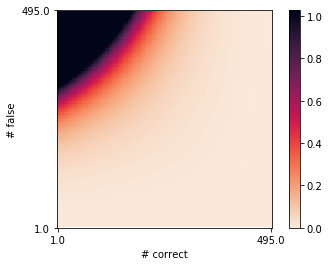

In [58]:
formula = 'replay_freq_0_1_all ~ hmm_ncorrect_all * hmm_nfalse_all'

data_sub = data[['replay_freq_0_1_all', 'mouse',
                 'hmm_ncorrect_all',
                 'hmm_nfalse_all']]

# 0s in the dependent variable still converges, but LL is infinite
data_sub.replace(0, np.nan, inplace=True)
data_sub.dropna(inplace=True)

y, X = patsy.dmatrices(formula, data_sub, return_type='dataframe')
X = sm.add_constant(X)

# family = sm.families.Gamma()
family = sm.families.Gamma(link=sm.families.links.log)
# family = sm.families.Gaussian()
# family = sm.families.Gaussian(link=sm.families.links.log)

glm = sm.GLM(y, X, family=family)
glm_results = glm.fit()
print(glm_results.summary2())

exog = glm.exog
x1_range = (exog[:, 1:3].min(), exog[:, 1:3].max())
x2_range = x1_range
x1_val = np.linspace(x1_range[0], x1_range[1], exog.shape[0])
x2_val = np.linspace(x1_range[0], x1_range[1], exog.shape[0])
x1_val_mesh, x2_val_mesh = np.meshgrid(x1_val, x2_val)
new_exog = np.ones((np.prod(x1_val_mesh.shape), 4))
new_exog[:, 1] = x1_val_mesh.flat
new_exog[:, 2] = x2_val_mesh.flat
new_exog[:, 3] = np.multiply(x1_val_mesh.flat, x2_val_mesh.flat)
predict = glm_results.get_prediction(new_exog)

fig, ax = plt.subplots()
predict_react = np.reshape(predict.predicted_mean, x1_val_mesh.shape)
plt.imshow(np.flipud(predict_react),
          cmap=sns.cm.rocket_r, vmin=0, vmax=predict_react.max() * 0.05)
plt.colorbar()
ax.set_xticks([ax.get_xlim()[0] + 0.5, ax.get_xlim()[1] - 0.5])
ax.set_xticklabels(x1_range)
ax.set_yticks([ax.get_ylim()[0] + 0.5, ax.get_ylim()[1] - 0.5])
ax.set_yticklabels(x2_range)
ax.set_xlabel('# correct')
ax.set_ylabel('# false');

                    Results: Generalized linear model
Model:                 GLM                   AIC:              -639.4979
Link Function:         log                   BIC:              -288.0380
Dependent Variable:    replay_freq_0_1_all   Log-Likelihood:   323.75   
Date:                  2018-05-18 13:55      LL-Null:          311.00   
No. Observations:      91                    Deviance:         104.41   
Df Model:              3                     Pearson chi2:     76.8     
Df Residuals:          87                    Scale:            0.88239  
Method:                IRLS                                             
------------------------------------------------------------------------
                         Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------------
Intercept               -4.6959   0.1289 -36.4407 0.0000 -4.9485 -4.4433
ncorrect_all            -0.5337   0.1764  -3.0263 0.0025 -0.8794 -0.18

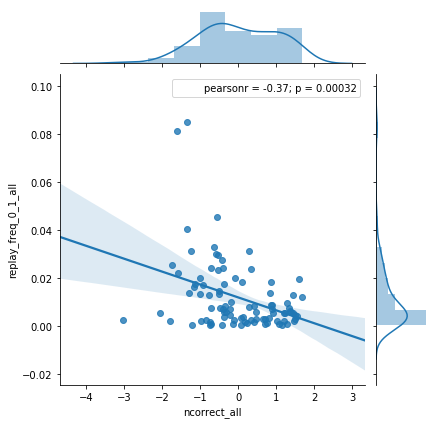

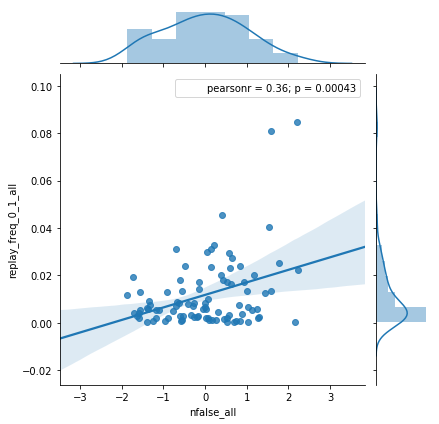

In [59]:
formula = 'replay_freq_0_1_all ~ ncorrect_all * nfalse_all'

data_sub = data[['replay_freq_0_1_all', 'mouse',
                 'ncorrect_plus', 'ncorrect_minus', 'ncorrect_neutral',
                 'nfalse_plus', 'nfalse_minus', 'nfalse_neutral']]
# HACK
data_sub['nfalse_all'] = data_sub.nfalse_plus + data_sub.nfalse_minus + \
    data_sub.nfalse_neutral
data_sub['ncorrect_all'] = data_sub.ncorrect_plus + \
    data_sub.ncorrect_minus + data_sub.ncorrect_neutral

# 0s in the dependent variable still converges, but LL is infinite
data_sub.replace(0, np.nan, inplace=True)
data_sub.dropna(inplace=True)

from scipy.stats.mstats import zscore
data_sub = data_sub.assign(ncorrect_all=zscore(data_sub.ncorrect_all),
                 nfalse_all=zscore(data_sub.nfalse_all))

y, X = patsy.dmatrices(formula, data_sub, return_type='dataframe')
X = sm.add_constant(X)

# family = sm.families.Gamma()
family = sm.families.Gamma(link=sm.families.links.log)
# family = sm.families.Gaussian()
# family = sm.families.Gaussian(link=sm.families.links.log)

glm = sm.GLM(y, X, family=family)
glm_results = glm.fit()
print(glm_results.summary2())
sns.jointplot(x='ncorrect_all', y='replay_freq_0_1_all', data=data_sub, kind='reg')
sns.jointplot(x='nfalse_all', y='replay_freq_0_1_all', data=data_sub, kind='reg')

In [60]:
formula = 'replay_freq_0_1_all ~ hmm_ncorrect_plus + hmm_ncorrect_minus + hmm_ncorrect_neutral + hmm_nfalse_plus + hmm_nfalse_minus + hmm_nfalse_neutral'

data_sub = data[['replay_freq_0_1_all', 'mouse',
                 'hmm_ncorrect_plus', 'hmm_ncorrect_minus', 'hmm_ncorrect_neutral',
                 'hmm_nfalse_plus', 'hmm_nfalse_minus', 'hmm_nfalse_neutral', 'hmm_dprime']]

# 0s in the dependent variable still converges, but LL is infinite
data_sub.replace(0, np.nan, inplace=True)
data_sub.dropna(inplace=True)

y, X = patsy.dmatrices(formula, data_sub, return_type='dataframe')
X = sm.add_constant(X)

# family = sm.families.Gamma()
family = sm.families.Gamma(link=sm.families.links.log)
# family = sm.families.Gaussian()
# family = sm.families.Gaussian(link=sm.families.links.log)

glm = sm.GLM(y, X, family=family)
glm_results = glm.fit()
print(glm_results.summary2())

                  Results: Generalized linear model
Model:                GLM                  AIC:             -626.5003
Link Function:        log                  BIC:             -276.9956
Dependent Variable:   replay_freq_0_1_all  Log-Likelihood:  320.25   
Date:                 2018-05-18 13:55     LL-Null:         306.13   
No. Observations:     90                   Deviance:        96.489   
Df Model:             6                    Pearson chi2:    73.4     
Df Residuals:         83                   Scale:           0.88390  
Method:               IRLS                                           
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
Intercept            -4.8465   0.4336 -11.1778 0.0000 -5.6963 -3.9967
hmm_ncorrect_plus    -0.0053   0.0036  -1.4624 0.1436 -0.0125  0.0018
hmm_ncorrect_minus   -0.0003   0.0097 

## Predict each replay type

In [61]:
formula = 'replay_freq_0_1_all ~ hmm_nfalse_plus + hmm_nfalse_minus + hmm_nfalse_neutral'

data_sub = data[['replay_freq_0_1_all', 'mouse',
                 'hmm_nfalse_plus', 'hmm_nfalse_minus', 'hmm_nfalse_neutral']]

# 0s in the dependent variable still converges, but LL is infinite
data_sub.replace(0, np.nan, inplace=True)
data_sub.dropna(inplace=True)

y, X = patsy.dmatrices(formula, data_sub, return_type='dataframe')
X = sm.add_constant(X)

# family = sm.families.Gamma()
family = sm.families.Gamma(link=sm.families.links.log)
# family = sm.families.Gaussian()
# family = sm.families.Gaussian(link=sm.families.links.log)

glm = sm.GLM(y, X, family=family)
glm_results = glm.fit()
print(glm_results.summary2())

                 Results: Generalized linear model
Model:                GLM                 AIC:            -628.8646
Link Function:        log                 BIC:            -287.2336
Dependent Variable:   replay_freq_0_1_all Log-Likelihood: 318.43   
Date:                 2018-05-18 13:55    LL-Null:        306.22   
No. Observations:     90                  Deviance:       99.750   
Df Model:             3                   Pearson chi2:   76.4     
Df Residuals:         86                  Scale:          0.88867  
Method:               IRLS                                         
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Intercept          -5.2163   0.1802 -28.9484 0.0000 -5.5694 -4.8631
hmm_nfalse_plus     0.0217   0.0095   2.2783 0.0227  0.0030  0.0403
hmm_nfalse_minus    0.0193   0.0079   2.4538 0.0141  0.0039  0.03

In [62]:
formula = 'replay_freq_0_1_all ~ hmm_behavior + hmm_dprime'

data_sub = data[['replay_freq_0_1_all', 'mouse',
                 'hmm_nfalse_all', 'hmm_behavior', 'hmm_dprime']]

# 0s in the dependent variable still converges, but LL is infinite
data_sub.replace(0, np.nan, inplace=True)
data_sub.dropna(inplace=True)

y, X = patsy.dmatrices(formula, data_sub, return_type='dataframe')
X = sm.add_constant(X)

# family = sm.families.Gamma()
family = sm.families.Gamma(link=sm.families.links.log)
# family = sm.families.Gaussian()
# family = sm.families.Gaussian(link=sm.families.links.log)

glm = sm.GLM(y, X, family=family)
glm_results = glm.fit()
print(glm_results.summary2())

                Results: Generalized linear model
Model:              GLM                 AIC:            -694.6257
Link Function:      log                 BIC:            -317.1363
Dependent Variable: replay_freq_0_1_all Log-Likelihood: 350.31   
Date:               2018-05-18 13:55    LL-Null:        340.14   
No. Observations:   98                  Deviance:       118.44   
Df Model:           2                   Pearson chi2:   93.7     
Df Residuals:       95                  Scale:          0.98660  
Method:             IRLS                                         
------------------------------------------------------------------
                Coef.   Std.Err.     z     P>|z|    [0.025  0.975]
------------------------------------------------------------------
Intercept      -2.1540    1.1172  -1.9279  0.0539  -4.3437  0.0358
hmm_behavior   -3.1125    1.9128  -1.6272  0.1037  -6.8615  0.6365
hmm_dprime      0.0057    0.2125   0.0269  0.9785  -0.4107  0.4222



In [63]:
formula = 'replay_freq_0_1_plus ~ hmm_nfalse_plus + hmm_nfalse_minus + hmm_nfalse_neutral'

data_sub = data[['replay_freq_0_1_plus', 'mouse',
                 'hmm_nfalse_plus', 'hmm_nfalse_minus', 'hmm_nfalse_neutral']]

# 0s in the dependent variable still converges, but LL is infinite
data_sub.replace(0, np.nan, inplace=True)
data_sub.dropna(inplace=True)

y, X = patsy.dmatrices(formula, data_sub, return_type='dataframe')
X = sm.add_constant(X)

# family = sm.families.Gamma()
family = sm.families.Gamma(link=sm.families.links.log)
# family = sm.families.Gaussian()
# family = sm.families.Gaussian(link=sm.families.links.log)

glm = sm.GLM(y, X, family=family)
glm_results = glm.fit()
print(glm_results.summary2())

                 Results: Generalized linear model
Model:               GLM                  AIC:            -803.7090
Link Function:       log                  BIC:            -284.9932
Dependent Variable:  replay_freq_0_1_plus Log-Likelihood: 405.85   
Date:                2018-05-18 13:55     LL-Null:        387.61   
No. Observations:    90                   Deviance:       101.99   
Df Model:            3                    Pearson chi2:   90.1     
Df Residuals:        86                   Scale:          1.0479   
Method:              IRLS                                          
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Intercept          -6.2935   0.1912 -32.9211 0.0000 -6.6682 -5.9188
hmm_nfalse_plus     0.0254   0.0102   2.4912 0.0127  0.0054  0.0454
hmm_nfalse_minus    0.0326   0.0086   3.7945 0.0001  0.0158  0.04

In [64]:
formula = 'replay_freq_0_1_minus ~ hmm_nfalse_plus + hmm_nfalse_minus + hmm_nfalse_neutral'

data_sub = data[['replay_freq_0_1_minus', 'mouse',
                 'hmm_nfalse_plus', 'hmm_nfalse_minus', 'hmm_nfalse_neutral']]

# 0s in the dependent variable still converges, but LL is infinite
data_sub.replace(0, np.nan, inplace=True)
data_sub.dropna(inplace=True)

y, X = patsy.dmatrices(formula, data_sub, return_type='dataframe')
X = sm.add_constant(X)

# family = sm.families.Gamma()
family = sm.families.Gamma(link=sm.families.links.log)
# family = sm.families.Gaussian()
# family = sm.families.Gaussian(link=sm.families.links.log)

glm = sm.GLM(y, X, family=family)
glm_results = glm.fit()
print(glm_results.summary2())

                 Results: Generalized linear model
Model:              GLM                   AIC:            -793.0642
Link Function:      log                   BIC:            -288.0623
Dependent Variable: replay_freq_0_1_minus Log-Likelihood: 400.53   
Date:               2018-05-18 13:55      LL-Null:        398.31   
No. Observations:   91                    Deviance:       104.38   
Df Model:           3                     Pearson chi2:   159.     
Df Residuals:       87                    Scale:          1.8273   
Method:             IRLS                                           
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Intercept          -5.9404   0.2490 -23.8560 0.0000 -6.4284 -5.4523
hmm_nfalse_plus     0.0116   0.0136   0.8530 0.3937 -0.0151  0.0384
hmm_nfalse_minus    0.0060   0.0113   0.5301 0.5960 -0.0162  0.02

In [65]:
formula = 'replay_freq_0_1_neutral ~ hmm_nfalse_plus + hmm_nfalse_minus + hmm_nfalse_neutral'

data_sub = data[['replay_freq_0_1_neutral', 'mouse',
                 'hmm_nfalse_plus', 'hmm_nfalse_minus', 'hmm_nfalse_neutral']]

# 0s in the dependent variable still converges, but LL is infinite
# data_sub.replace(0, np.nan, inplace=True)
# data_sub.dropna(inplace=True)

y, X = patsy.dmatrices(formula, data_sub, return_type='dataframe')
X = sm.add_constant(X)

family = sm.families.Gamma(link=sm.families.links.log)

glm = sm.GLM(y, X, family=family)
glm_results = glm.fit()
print(glm_results.summary2())

                  Results: Generalized linear model
Model:              GLM                     AIC:            -inf     
Link Function:      log                     BIC:            1015.1370
Dependent Variable: replay_freq_0_1_neutral Log-Likelihood: inf      
Date:               2018-05-18 13:55        LL-Null:        inf      
No. Observations:   108                     Deviance:       1502.1   
Df Model:           3                       Pearson chi2:   201.     
Df Residuals:       104                     Scale:          1.9328   
Method:             IRLS                                             
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
Intercept            -6.5497   0.2407 -27.2114 0.0000 -7.0214 -6.0779
hmm_nfalse_plus       0.0245   0.0119   2.0594 0.0395  0.0012  0.0479
hmm_nfalse_minus      0.0123   0.0079 

In [66]:
formula = 'replay_freq_0_1_all ~ hmm_behavior_plus + hmm_behavior_minus + hmm_behavior_neutral'

data_sub = data[['replay_freq_0_1_all', 'mouse',
                 'hmm_behavior_plus', 'hmm_behavior_minus', 'hmm_behavior_neutral']]

# 0s in the dependent variable still converges, but LL is infinite
# data_sub.replace(0, np.nan, inplace=True)
# data_sub.dropna(inplace=True)

y, X = patsy.dmatrices(formula, data_sub, return_type='dataframe')
X = sm.add_constant(X)

family = sm.families.Gamma(link=sm.families.links.log)

glm = sm.GLM(y, X, family=family)
glm_results = glm.fit()
print(glm_results.summary2())

                  Results: Generalized linear model
Model:                GLM                   AIC:              -inf  
Link Function:        log                   BIC:              8.3174
Dependent Variable:   replay_freq_0_1_all   Log-Likelihood:   inf   
Date:                 2018-05-18 13:55      LL-Null:          inf   
No. Observations:     103                   Deviance:         467.16
Df Model:             3                     Pearson chi2:     107.  
Df Residuals:         99                    Scale:            1.0813
Method:               IRLS                                          
--------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
--------------------------------------------------------------------
Intercept            -1.8869   0.6333 -2.9793 0.0029 -3.1282 -0.6456
hmm_behavior_plus    -1.5348   0.6692 -2.2937 0.0218 -2.8463 -0.2233
hmm_behavior_minus   -2.6223   1.0043 -2.6109 0.009

## Visualize replay driving criterion shift

                    Results: Generalized linear model
Model:                 GLM                    AIC:              61.2334  
Link Function:         identity               BIC:              -242.0927
Dependent Variable:    d_hmm_criterion_next   Log-Likelihood:   -25.617  
Date:                  2018-05-18 13:55       LL-Null:          -28.625  
No. Observations:      65                     Deviance:         8.3705   
Df Model:              4                      Pearson chi2:     8.37     
Df Residuals:          60                     Scale:            0.13951  
Method:                IRLS                                              
-------------------------------------------------------------------------
                         Coef.   Std.Err.    z    P>|z|   [0.025   0.975]
-------------------------------------------------------------------------
Intercept                -0.0304   0.0760 -0.4005 0.6888  -0.1793  0.1185
replay_freq_0_1_plus     10.9893  11.8212  0.9296 0.3526 -

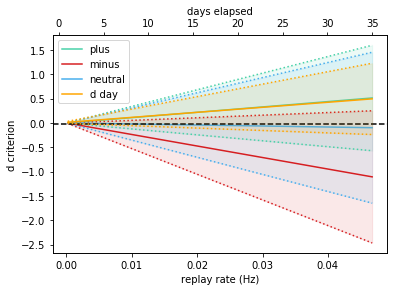

In [67]:
formula = 'd_hmm_criterion_next ~ replay_freq_0_1_plus + replay_freq_0_1_minus + replay_freq_0_1_neutral + d_day_next'

data_sub = data[['d_hmm_criterion_next', 'd_day_next',
                 'replay_freq_0_1_plus', 'replay_freq_0_1_minus', 'replay_freq_0_1_neutral']]

# 0s in the dependent variable still converges, but LL is infinite
data_sub.replace(0, np.nan, inplace=True)
data_sub.dropna(inplace=True)

y, X = patsy.dmatrices(formula, data_sub, return_type='dataframe')
X = sm.add_constant(X)

# family = sm.families.Gamma()
# family = sm.families.Gamma(link=sm.families.links.log)
family = sm.families.Gaussian()
# family = sm.families.Gaussian(link=sm.families.links.log)

glm = sm.GLM(y, X, family=family)
glm_results = glm.fit()
print(glm_results.summary2())

exog = glm.exog

fig, ax1 = plt.subplots()
lines = []
c = {'plus': colors['plus'],
     'minus': colors['minus'],
     'neutral': colors['neutral'],
     'd days': 'orange',
     'intercept': 'black'}

x_range = (exog[:, 1:4].min(), exog[:, 1:4].max())
x = np.linspace(x_range[0], x_range[1], exog.shape[0])
for idx, var in enumerate(('plus', 'minus', 'neutral')):
    idx += 1
    new_exog = np.zeros_like(exog)
#     new_exog[:, 0] = exog[:, 0]
    new_exog[:, idx] = x
    predict = glm_results.get_prediction(new_exog)
    conf = predict.conf_int()
    
    l, = ax1.plot(x, predict.predicted_mean, color=c[var], label=var)
    ax1.plot(x, conf[:, 0], color=c[var], ls=':')
    ax1.plot(x, conf[:, 1], color=c[var], ls=':')
    ax1.fill_between(x, conf[:, 0], conf[:, 1], alpha=0.1, color=c[var])
    
    lines.append(l)

x = np.ones(exog.shape[0])
new_exog = np.zeros_like(exog)
# new_exog[:, 0] = exog[:, 0]
new_exog[:, 0] = x
predict = glm_results.get_prediction(new_exog)
conf = predict.conf_int()

ax1.axhline(predict.predicted_mean.mean(), color=c['intercept'], label='intercept', ls='--')

x_range= (exog[:, 4].min(), exog[:, 4].max())
x = np.linspace(x_range[0], x_range[1], exog.shape[0])
new_exog = np.zeros_like(exog)
# new_exog[:, 0] = exog[:, 0]
new_exog[:, 4] = x
predict = glm_results.get_prediction(new_exog)
conf = predict.conf_int()

ax2 = ax1.twiny()
l, = ax2.plot(x, predict.predicted_mean, label='d day', color='orange')
ax2.plot(x, conf[:, 0], color='orange', ls=':')
ax2.plot(x, conf[:, 1], color='orange', ls=':')
ax2.fill_between(x, conf[:, 0], conf[:, 1], alpha=0.1, color='orange')
lines.append(l)

ax1.legend(handles=lines, loc=2)

# ax1.axhline(0, ls='--', color='k')

ax1.set_xlabel('replay rate (Hz)')
ax2.set_xlabel('days elapsed')
ax1.set_ylabel('d criterion');

## Reconsolidation reevaluates memories in the current context, so if we model behavior as 'dprime_next ~ replay*dprime', we should see a strong interaction term.

In [68]:
# formula = 'replay_freq_0_1_all ~ hmm_dprime * d_hmm_dprime_prev'
# lm = ols(formula, data).fit()
# print(lm.summary2())
# print(anova_lm(lm))

formula = 'hmm_dprime_next ~ hmm_dprime * replay_freq_0_1_all'
data_sub = data[['replay_freq_0_1_all', 'hmm_dprime', 'hmm_dprime_next',
                 'mouse']]
data_sub.dropna(inplace=True)
md = mixedlm(formula, data_sub, groups='mouse', re_formula='1').fit()
print(md.summary())

                   Mixed Linear Model Regression Results
Model:                  MixedLM     Dependent Variable:     hmm_dprime_next
No. Observations:       90          Method:                 REML           
No. Groups:             8           Scale:                  0.9238         
Min. group size:        6           Likelihood:             -119.0454      
Max. group size:        21          Converged:              No             
Mean group size:        11.2                                               
---------------------------------------------------------------------------
                                Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
---------------------------------------------------------------------------
Intercept                        1.349    0.285  4.730 0.000   0.790  1.908
hmm_dprime                       0.426    0.125  3.418 0.001   0.182  0.670
replay_freq_0_1_all            -20.901   11.999 -1.742 0.082 -44.419  2.616
hmm_dprime:replay_freq_0_1_all 